# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/_unconv.zip')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

[Text(0.5, 0, 'коэффициент отражения витринита (%)'),
 Text(0, 0.5, 'добыча газа в сутки (млн. кубических футов)')]

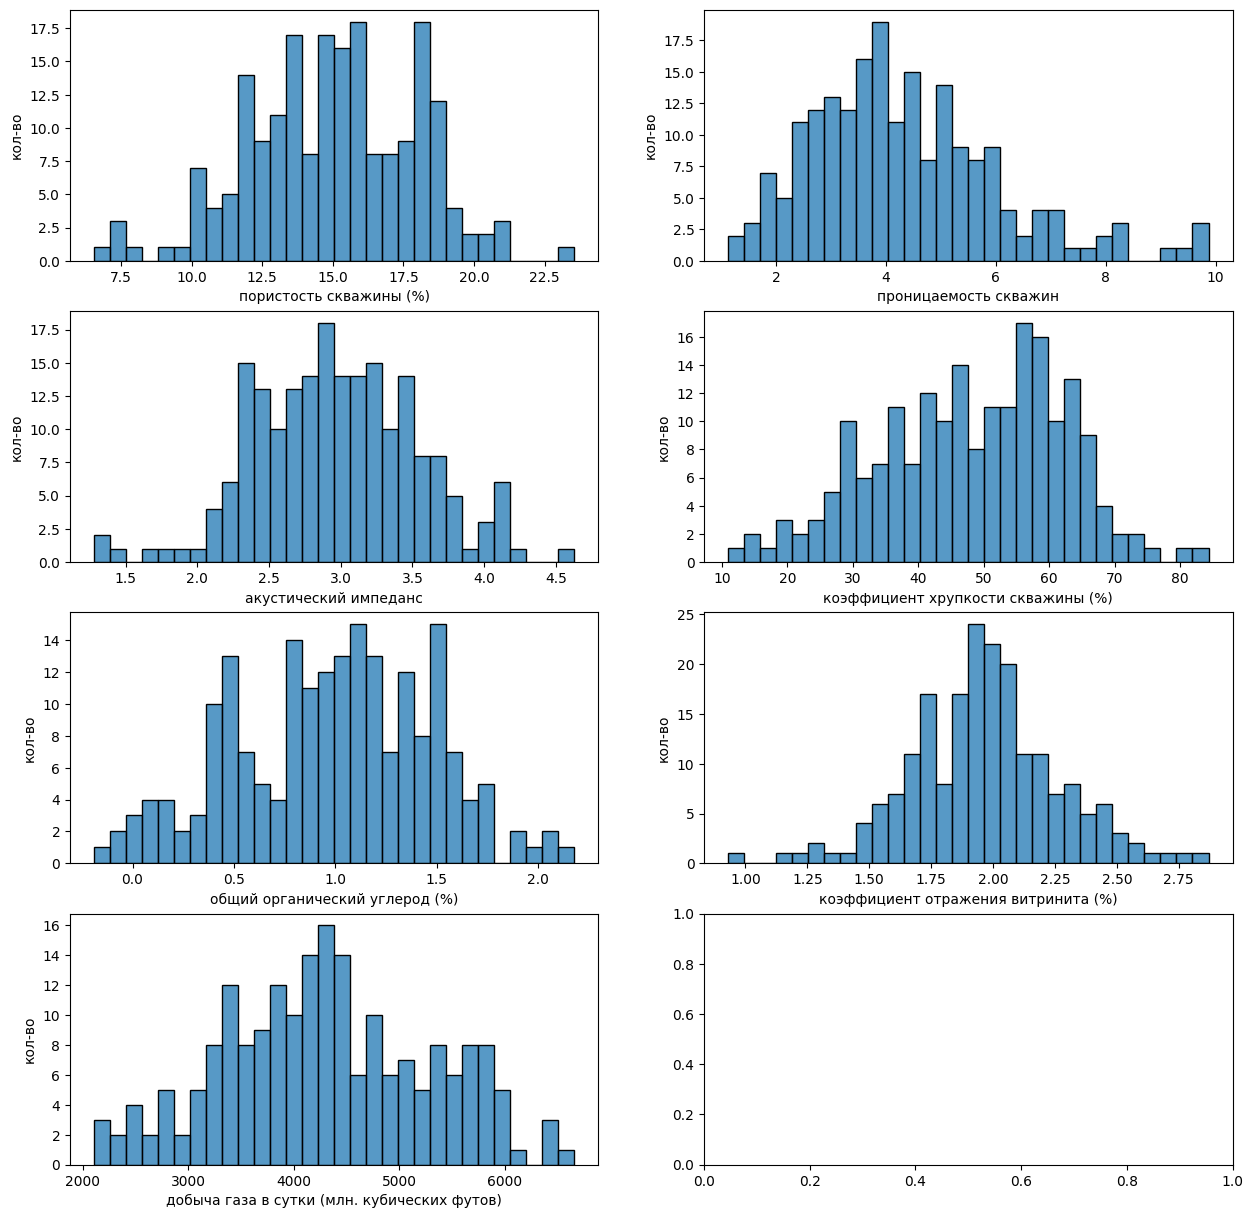

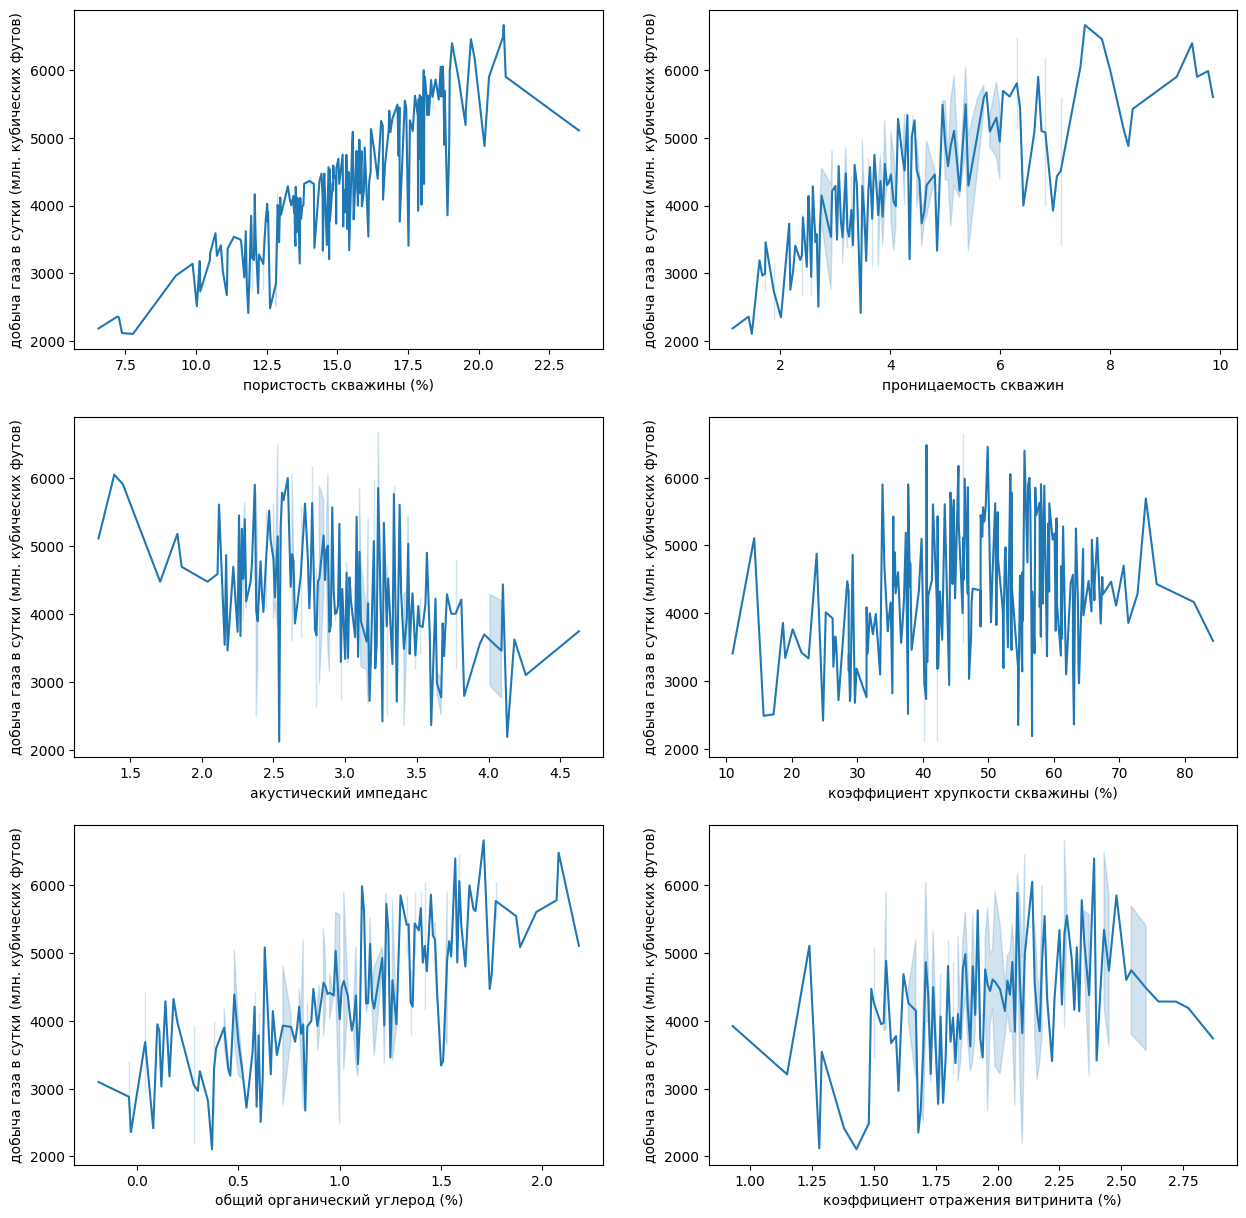

In [3]:
# Ваш код здесь
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

histplot = sns.histplot(data['Por'], bins=30, ax=axes[0, 0])
# histplot.set_title('пористость скважины (%)');
histplot.set(xlabel='пористость скважины (%)', ylabel='кол-во')

histplot = sns.histplot(data['Perm'], bins=30, ax=axes[0, 1])
# histplot.set_title('проницаемость скважин');
histplot.set(xlabel='проницаемость скважин', ylabel='кол-во')

histplot = sns.histplot(data['AI'], bins=30, ax=axes[1, 0])
# histplot.set_title('акустический импеданс')
histplot.set(xlabel='акустический импеданс', ylabel='кол-во')

histplot = sns.histplot(data['Brittle'], bins=30, ax=axes[1, 1])
# histplot.set_title('коэффициент хрупкости скважины (%)')
histplot.set(xlabel='коэффициент хрупкости скважины (%)', ylabel='кол-во')

histplot = sns.histplot(data['TOC'], bins=30, ax=axes[2, 0])
# histplot.set_title('общий органический углерод (%)')
histplot.set(xlabel='общий органический углерод (%)', ylabel='кол-во')

histplot = sns.histplot(data['VR'], bins=30, ax=axes[2, 1])
# histplot.set_title('коэффициент отражения витринита (%)')
histplot.set(xlabel='коэффициент отражения витринита (%)', ylabel='кол-во')

histplot = sns.histplot(data['Prod'], bins=30, ax=axes[3, 0])
# histplot.set_title('добыча газа в сутки (млн. кубических футов)')
histplot.set(xlabel='добыча газа в сутки (млн. кубических футов)', ylabel='кол-во')



fig, axes = plt.subplots(3, 2, figsize=(15, 15))

histplot = sns.lineplot(x= data['Por'], y= data['Prod'], ax=axes[0, 0])
histplot.set(xlabel='пористость скважины (%)', ylabel='добыча газа в сутки (млн. кубических футов)')

histplot = sns.lineplot(x= data['Perm'], y= data['Prod'], ax=axes[0, 1])
histplot.set(xlabel='проницаемость скважин', ylabel='добыча газа в сутки (млн. кубических футов)')

histplot = sns.lineplot(x= data['AI'], y= data['Prod'], ax=axes[1, 0])
histplot.set(xlabel='акустический импеданс', ylabel='добыча газа в сутки (млн. кубических футов)')

histplot = sns.lineplot(x= data['Brittle'], y= data['Prod'], ax=axes[1, 1])
histplot.set(xlabel='коэффициент хрупкости скважины (%)', ylabel='добыча газа в сутки (млн. кубических футов)')

histplot = sns.lineplot(x= data['TOC'], y= data['Prod'], ax=axes[2, 0])
histplot.set(xlabel='общий органический углерод (%)', ylabel='добыча газа в сутки (млн. кубических футов)')

histplot = sns.lineplot(x= data['VR'], y= data['Prod'], ax=axes[2, 1])
histplot.set(xlabel='коэффициент отражения витринита (%)', ylabel='добыча газа в сутки (млн. кубических футов)')

**Выводы:** 
1. Все параметры имеют нормальное распределение. 
2. Целевая переменная имеет почти линейную зависимость от каждого отдельного параметра датасета.  

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Ранг корраляционной матрицы -  8
Определитель корреаляционной матрицы -  0.0007299388072652095


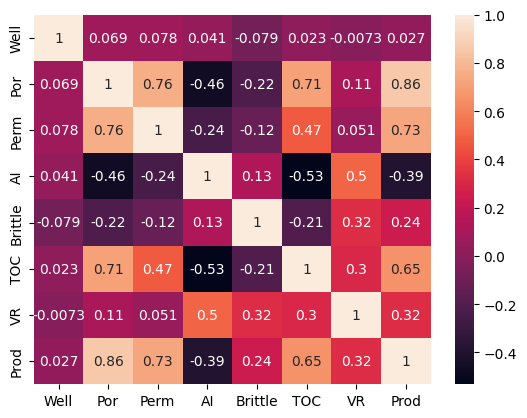

In [4]:
# Ваш код здесь
correlation_matrix = data.corr()

ax1 = sns.heatmap(correlation_matrix, annot=True)

print('Ранг корраляционной матрицы - ', np.linalg.matrix_rank(correlation_matrix))
print('Определитель корреаляционной матрицы - ', np.linalg.det(correlation_matrix))

**Выводы:**
1. Какие факторы сильнее всего коррелируют с целевой переменной?  
*Наибольшую корреляцию с целевой переменной имеют параметры Por (пористость скважины (%)) - 0.86, Perm (проницаемость скважин) - 0.73, TOC (общий органический углерод (%)) - 0.65.*

2. Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?  
*Определитель матрицы близок к нулю. матрицы плохо обусловлена.*

3. Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?   
*Ранг матрицы совпадает с ее размером, значит чистой коллинеарнойсти нет. Однако Определитель матрицы близок к нулю,значит имеем мультиколлинеарнойсть в матрице. Возможно следует рассмотреть зависимость параметров Perm-Por, которая составляет 0.76.*

4. Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?   
*модель классической линейной регрессии применима, но коэффициенты возможно будут некорректно отображать вклад каждого конкретного параметра в оценку целевой переменной. Для уточнения влияния конкретных параметров на целвую переменную мультиколлинеарнойтсь следует убрать.*







### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [5]:
# Ваш код здесь
# составляем матрицу наблюдений и вектор целевой переменной
X = data.drop('Prod', axis=1)
X = pd.concat([pd.DataFrame(np.ones(X.shape[0]), columns=['wo']), X], axis=1)
y = data[['Prod']]
# вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat=np.linalg.inv(X.T@X)@X.T@y

i = 0
for column in X.columns:
    print('Коэффициент', column, '-', np.round(w_hat.values[i], 0))
    i += 1

Коэффициент wo - [-1232.]
Коэффициент Well - [0.]
Коэффициент Por - [230.]
Коэффициент Perm - [116.]
Коэффициент AI - [-365.]
Коэффициент Brittle - [25.]
Коэффициент TOC - [-78.]
Коэффициент VR - [785.]


**Выводы:**

1. Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?  
*Коэффициент признака Well (идентификатор скважины) имеет коэффициент стремящийся к нулю, что не удивительно, так как связи быть не должно. Так же теоретически коэффициент Brittle (коэффициент хрупкости скважины (%)) небольшой относительно остальных коэфициентов и при необходимости исключить параметр, исключать нужно его. Кроме того Brittle измеряется в процентах и больших значений достигнуть не должен.*

2. Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.  
*При увеличении VR (коэффициент отражения витринита (%)) на 1% при прочих равных целевая переменная будет увеличена на 785 единиц.*  
*При увеличении AI (акустический импеданс) на одну единицу при прочих равных целевая переменная будет уменьшена на 365 единиц.*

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [6]:
# Ваш код здесь
pred_values = {
    'wo' : 1,
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }

target_value = 0
true_target_value = 4748.315024
i = 0
for column in X.columns:
   target_value +=  pred_values[column]*w_hat.values[i]
   i += 1
   
print('Целевая переменная первого примера = ', target_value[0])
print('Абсолютная ошибка первого примера = ', true_target_value - target_value[0], '\n')

#Расчитаем предсказанное значение

y_pred = []
i = 0
target_value = 0
for i in range(X.shape[0]):
    j = 0
    for column in X.columns:
        target_value +=  X.iloc[i][column]*w_hat.values[j]
        j += 1
    y_pred.append(target_value[0])
    target_value = 0


#Для оценки ошибки выберем MAPE и MAE

# Рассчитаем MAE
i = 0 
sum = 0
for i in range(len(y_pred)):
    sum += abs(y.iloc[i]['Prod'] - y_pred[i])
mae = sum / len(y_pred)

print('MAE на всём обучающем наборе данных = ', mae)

# Рассчитаем MAPE
i = 0 
sum = 0
for i in range(len(y_pred)):
    sum += abs(y.iloc[i]['Prod'] - y_pred[i])/y.iloc[i]['Prod']
mae = round((sum / len(y_pred)) * 100, 1)

print('MAPE на всём обучающем наборе данных = ', mae, '%')

# Для того чтобы понять насколько модель хороша рассчитаем R2
i = 0 
sum = 0
for i in range(len(y_pred)):
    sum += (y.iloc[i]['Prod'] - y_pred[i])**2
mse = sum / len(y_pred)

for i in range(len(y_pred)):
    sum += (y.iloc[i]['Prod'] - y['Prod'].mean())**2
mse_mean = sum / len(y_pred)

r2 = 1 - (mse/mse_mean)

print('R2 на всём обучающем наборе данных = ', r2)



Целевая переменная первого примера =  4723.064053707183
Абсолютная ошибка первого примера =  25.25097029281733 

MAE на всём обучающем наборе данных =  153.62297086558175
MAPE на всём обучающем наборе данных =  3.6 %
R2 на всём обучающем наборе данных =  0.9614003864791626


**Вывод:**  
*Модель, рассчитанная по методу наименьших квадратов показала очень хорошие результаты. Имеет среднюю абсолюьтную ошибку в процентак 3.6% и коэфиициент детерминации 0.96.*

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [7]:
# Ваш код здесь

i = 0
for column in X.columns:
    print(column, ':   ', 'Коэффициент',  '-', np.round(w_hat.values[i], 0),  end='') 
    if column != 'wo':
        print('/', 'Значение корреляции', '-', round(correlation_matrix['Prod'][column], 2))
    else:
        print()
    i += 1


wo :    Коэффициент - [-1232.]
Well :    Коэффициент - [0.]/ Значение корреляции - 0.03
Por :    Коэффициент - [230.]/ Значение корреляции - 0.86
Perm :    Коэффициент - [116.]/ Значение корреляции - 0.73
AI :    Коэффициент - [-365.]/ Значение корреляции - -0.39
Brittle :    Коэффициент - [25.]/ Значение корреляции - 0.24
TOC :    Коэффициент - [-78.]/ Значение корреляции - 0.65
VR :    Коэффициент - [785.]/ Значение корреляции - 0.32


**Выводы:**

1. Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.  
*Необходимо отметить параметр TOC, для которого значение корреляции имеет положительное значение, коэициент линейной регрессии отрицателен.*
*Так же можно отметить параметр Well для которого значение корреляции не равно 0, но значение коэфиициента линейной регрессии принимает значение 0*

2. Как вы считаете, с чем связано полученное противоречие результатов?  
*Возможно противоречие связано с тем, что матрица плохо обусловлена и пока не удалены параметры, имеющие мультиколлинеарность, полностью доверять коэфиициентам нельзя.*

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [8]:
# Ваш код здесь
X = X.drop(['Well', 'TOC', 'Perm'], axis=1)

Ранг корраляционной матрицы -  5
Определитель корреаляционной матрицы -  0.02018067343345253


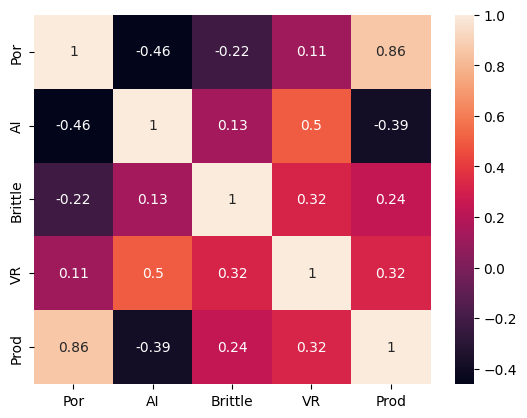

In [9]:
correlation_matrix = data.drop(['Well', 'TOC', 'Perm'], axis=1).corr()

ax1 = sns.heatmap(correlation_matrix, annot=True)

print('Ранг корраляционной матрицы - ', np.linalg.matrix_rank(correlation_matrix))
print('Определитель корреаляционной матрицы - ', np.linalg.det(correlation_matrix))

In [10]:
# Рассчитываем коэфиициенты
w_hat=np.linalg.inv(X.T@X)@X.T@y

i = 0
for column in X.columns:
    print(column, ':   ', 'Коэффициент',  '-', np.round(w_hat.values[i], 0),  end='') 
    if column != 'wo':
        print('/', 'Значение корреляции', '-', round(correlation_matrix['Prod'][column], 2))
    else:
        print()
    i += 1
print('')   
y_pred = []
i = 0
target_value = 0
for i in range(X.shape[0]):
    j = 0
    for column in X.columns:
        target_value +=  X.iloc[i][column]*w_hat.values[j]
        j += 1
    y_pred.append(target_value[0])
    target_value = 0

# Рассчитаем MAE
i = 0 
sum = 0
for i in range(len(y_pred)):
    sum += abs(y.iloc[i]['Prod'] - y_pred[i])
mae = sum / len(y_pred)

print('MAE на всём обучающем наборе данных = ', mae)

# Рассчитаем MAPE
i = 0 
sum = 0
for i in range(len(y_pred)):
    sum += abs(y.iloc[i]['Prod'] - y_pred[i])/y.iloc[i]['Prod']
mae = round((sum / len(y_pred)) * 100, 1)

print('MAPE на всём обучающем наборе данных = ', mae, '%')

# Для того чтобы понять насколько модель хороша рассчитаем R2
i = 0 
sum = 0
for i in range(len(y_pred)):
    sum += (y.iloc[i]['Prod'] - y_pred[i])**2
mse = sum / len(y_pred)

for i in range(len(y_pred)):
    sum += (y.iloc[i]['Prod'] - y['Prod'].mean())**2
mse_mean = sum / len(y_pred)

r2 = 1 - (mse/mse_mean)

print('R2 на всём обучающем наборе данных = ', r2)

wo :    Коэффициент - [-1835.]
Por :    Коэффициент - [293.]/ Значение корреляции - 0.86
AI :    Коэффициент - [-200.]/ Значение корреляции - -0.39
Brittle :    Коэффициент - [28.]/ Значение корреляции - 0.24
VR :    Коэффициент - [517.]/ Значение корреляции - 0.32

MAE на всём обучающем наборе данных =  171.43146059580923
MAPE на всём обучающем наборе данных =  4.0 %
R2 на всём обучающем наборе данных =  0.9480473671285927


**Выводы:**

1. Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.  
*При увеличении параметра AI на одну единицу при прочих равных целевая переменная уменьшается на 200 единицы*  
*При увеличении параметра VR на одну единицу при прочих равных целевая переменная увеличивается на 517 единиц*

2. Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.  
Ранее получены следующие метрики:  
wo :    Коэффициент - [-1232.]  
Por :    Коэффициент - [230.]/ Значение корреляции - 0.86  
AI :    Коэффициент - [-365.]/ Значение корреляции - -0.39  
Brittle :    Коэффициент - [25.]/ Значение корреляции - 0.24  
VR :    Коэффициент - [785.]/ Значение корреляции - 0.32  

*Вновьполученные коэффициенты не сильно отличаются от коэффициентов, полученных в предыдущем эксперименте. Стоит отметить что сильнее всего изменились коэффициенты VR, AI и нулевой коэффициент. Можно осторожно предположить, что удаленные вектора были сонаправлены с этими VR и AI.*


3. Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?  
*После удаления признаков коэффтциентов линейной регрессии, противоречащих коэффициентам корреляции не осталось. Однако ошибка модели сильно увеличилась.*

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [11]:
# Ваш код здесь

#Создаем отчетный датафрейм
total = pd.DataFrame(columns=['model_name', 'hyperparameter', 'polinomil_features', 'MAE_train', 'MAPE_train', 'R2_train', 'MAE_test', 'MAPE_test', 'R2_test'])


X = X.drop('wo', axis=1)

#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)

i = 0
for column in X.columns:
    print('Коэффициент', column, '-', np.round(lr_lstat.coef_[0][i], 0))
    i += 1

y_pred = lr_lstat.predict(X)

lr_elem =['linearregression']
lr_elem.append(None)
lr_elem.append(False)

print('')


# Рассчитаем MAE
i = 0 
sum = 0
for i in range(len(y_pred)):
    sum += abs(y.iloc[i]['Prod'] - y_pred[i][0])
mae = sum / len(y_pred)

print('MAE для модели sklearn (ручной рассчет) = ', mae)

# Рассчитаем MAPE
i = 0 
sum = 0
for i in range(len(y_pred)):
    sum += abs(y.iloc[i]['Prod'] - y_pred[i][0])/y.iloc[i]['Prod']
mae = np.round((sum / len(y_pred)) * 100, 1)

print('MAPE для модели sklearn (ручной рассчет) = ', mae, '%')

# Для того чтобы понять насколько модель хороша рассчитаем R2
i = 0 
sum = 0
for i in range(len(y_pred)):
    sum += (y.iloc[i]['Prod'] - y_pred[i][0])**2
mse = sum / len(y_pred)

for i in range(len(y_pred)):
    sum += (y.iloc[i]['Prod'] - y['Prod'].mean())**2
mse_mean = sum / len(y_pred)

r2 = 1 - (mse/mse_mean)

print('R2 для модели sklearn (ручной рассчет) = ', r2)

print()

#Рассчитываем MAE
print(f'MAE для модели sklearn: {metrics.mean_absolute_error(y, y_pred):.3f}')
#Рассчитываем MAPE
print(f'MAPE для модели sklearn: {metrics.mean_absolute_percentage_error(y, y_pred) * 100:.3f} %')
#Рассчитываем коэффициент детерминации
print(f'R2 для модели sklearn: {metrics.r2_score(y, y_pred):.3f}')

lr_elem += [round(metrics.mean_absolute_error(y, y_pred),2), \
    round(metrics.mean_absolute_percentage_error(y, y_pred) * 100, 2), \
        round(metrics.r2_score(y, y_pred), 2)]

lr_elem += [None, None, None]
total.loc[total.shape[0]] = lr_elem


Коэффициент Por - 293.0
Коэффициент AI - -200.0
Коэффициент Brittle - 28.0
Коэффициент VR - 517.0

MAE для модели sklearn (ручной рассчет) =  171.43146059580792
MAPE для модели sklearn (ручной рассчет) =  4.0 %
R2 для модели sklearn (ручной рассчет) =  0.9480473671285927

MAE для модели sklearn: 171.431
MAPE для модели sklearn: 4.044 %
R2 для модели sklearn: 0.945


**Выводы:**

*Коэффициенты линейной регрессии, полученные вручную полностью совпадают с коэффициентами, полученными при применении модели sklearn. Стоит отметить, что метрики, рассчитанные sklearn несколько отличаются от метрик, рассчитанных вручную. Возможно имеет место машинное округление в одном из методов.*

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [12]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [13]:
# Ваш код здесь

X = data.drop(['Well', 'TOC', 'Perm', 'Prod'], axis=1)

# Стандартизируем признаки
scaler = StandardScaler()
X = scaler.fit_transform(X)

# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)

print(f'Колличество полиноминальных факторов {X.shape[1]}\n')

lr = LinearRegression()

lr_elem =['linearregression']
lr_elem.append(None)
lr_elem.append(True)




cv_results = cross_validate(lr, X, y, scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'], cv=5, return_train_score=True)
# cv_results.keys()
print(f'MAE на тренировочных фолдах: {cv_results["train_neg_mean_absolute_error"].mean():.2f}')
print(f'MAPE на тренировочных фолдах: {cv_results["train_neg_mean_absolute_percentage_error"].mean()*100:.2f}')
print(f'R2 на тренировочных фолдах: {cv_results["train_r2"].mean():.2f}\n')

lr_elem += [round(cv_results["train_neg_mean_absolute_error"].mean(),2), \
    round(cv_results["train_neg_mean_absolute_percentage_error"].mean()*100, 2), \
        round(cv_results["train_r2"].mean(), 2)]

print(f'MAE на тестовых фолдах: {cv_results["test_neg_mean_absolute_error"].mean():.2f}')
print(f'MAPE на тестовых фолдах: {cv_results["test_neg_mean_absolute_percentage_error"].mean()*100:.2f}')
print(f'R2 на тестовых фолдах: {cv_results["test_r2"].mean():.2f}')

lr_elem += [round(cv_results["test_neg_mean_absolute_error"].mean(),2), \
    round(cv_results["test_neg_mean_absolute_percentage_error"].mean()*100, 2), \
        round(cv_results["test_r2"].mean(), 2)]

total.loc[total.shape[0]] = lr_elem;


Колличество полиноминальных факторов 34

MAE на тренировочных фолдах: -75.35
MAPE на тренировочных фолдах: -1.77
R2 на тренировочных фолдах: 0.99

MAE на тестовых фолдах: -110.47
MAPE на тестовых фолдах: -2.68
R2 на тестовых фолдах: 0.97


C:\Users\zhigu\AppData\Local\Temp\ipykernel_50288\3175267081.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  total.loc[total.shape[0]] = lr_elem;


**Выводы:**

*Поскольку метрики на тренировочных молдах получились значительно лучше, чем на тренировочных, можно сделать предположение, что модель переобучена. Однако, исходя из метрик полученных на тестовых фолдах, можно предположить, что даже переобученная модель на полиноминальных признаках на приведенных данных показывает результаты лучше чем простая линейная регрессия*

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [14]:
# Ваш код здесь
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 5, 10, 100] ,
              }
grid_search = GridSearchCV(
    estimator=Lasso(
        max_iter=1000
    ), 
    param_grid=param_grid, 
    cv=5, 
    scoring='r2',
    n_jobs = -1
)  
%time grid_search.fit(X, y) 

lasso_elem =['lasso']

print(f'\nОптимальное значение alpha {grid_search.best_params_["alpha"]}\n')
# grid_search.cv_results_.keys()
lasso_elem.append(grid_search.best_params_)
lasso_elem.append(True)

lasso = Lasso(alpha=grid_search.best_params_['alpha'])
cv_results = cross_validate(lasso, X, y, scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'], cv=5, return_train_score=True)

print(f'MAE на тренировочных фолдах: {cv_results["train_neg_mean_absolute_error"].mean():.2f}')
print(f'MAPE на тренировочных фолдах: {cv_results["train_neg_mean_absolute_percentage_error"].mean()*100:.2f}')
print(f'R2 на тренировочных фолдах: {cv_results["train_r2"].mean():.2f}\n')

lasso_elem += [round(cv_results["train_neg_mean_absolute_error"].mean(),2), \
    round(cv_results["train_neg_mean_absolute_percentage_error"].mean()*100, 2), \
        round(cv_results["train_r2"].mean(), 2)]


print(f'MAE на тестовых фолдах: {cv_results["test_neg_mean_absolute_error"].mean():.2f}')
print(f'MAPE на тестовых фолдах: {cv_results["test_neg_mean_absolute_percentage_error"].mean()*100:.2f}')
print(f'R2 на тестовых фолдах: {cv_results["test_r2"].mean():.2f}')

lasso_elem += [round(cv_results["test_neg_mean_absolute_error"].mean(),2), \
    round(cv_results["test_neg_mean_absolute_percentage_error"].mean()*100, 2), \
        round(cv_results["test_r2"].mean(), 2)]

total.loc[total.shape[0]] = lasso_elem

CPU times: total: 188 ms
Wall time: 4.26 s

Оптимальное значение alpha 5

MAE на тренировочных фолдах: -78.30
MAPE на тренировочных фолдах: -1.83
R2 на тренировочных фолдах: 0.99

MAE на тестовых фолдах: -95.69
MAPE на тестовых фолдах: -2.28
R2 на тестовых фолдах: 0.98


**Выводы:**

*L1-регуляризация несколько ухудшила значение метрик на тренировочных фолдах, но на тестовых фолдах результат улучшился. Делаем вывод, что после введения L1-регуляризации модель стала менее переобученной. Оптимальный коэффициент alpha для L1-регуляризации - 5.*

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [15]:
# Ваш код здесь
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 5, 10, 100] ,
              }
grid_search = GridSearchCV(
    estimator=Ridge(
        max_iter=1000
    ), 
    param_grid=param_grid, 
    cv=5, 
    scoring='r2',
    n_jobs = -1
)  
%time grid_search.fit(X, y) 

ridge_elem =['ridge']

print(f'\nОптимальное значение alpha {grid_search.best_params_["alpha"]}\n')
# grid_search.cv_results_.keys()
ridge_elem.append(grid_search.best_params_)
ridge_elem.append(True)

ridge = Ridge(alpha=grid_search.best_params_['alpha'])
cv_results = cross_validate(ridge, X, y, scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'], cv=5, return_train_score=True)

print(f'MAE на тренировочных фолдах: {cv_results["train_neg_mean_absolute_error"].mean():.2f}')
print(f'MAPE на тренировочных фолдах: {cv_results["train_neg_mean_absolute_percentage_error"].mean()*100:.2f}')
print(f'R2 на тренировочных фолдах: {cv_results["train_r2"].mean():.2f}\n')

ridge_elem += [round(cv_results["train_neg_mean_absolute_error"].mean(),2), \
    round(cv_results["train_neg_mean_absolute_percentage_error"].mean()*100, 2), \
        round(cv_results["train_r2"].mean(), 2)]


print(f'MAE на тестовых фолдах: {cv_results["test_neg_mean_absolute_error"].mean():.2f}')
print(f'MAPE на тестовых фолдах: {cv_results["test_neg_mean_absolute_percentage_error"].mean()*100:.2f}')
print(f'R2 на тестовых фолдах: {cv_results["test_r2"].mean():.2f}')

ridge_elem += [round(cv_results["test_neg_mean_absolute_error"].mean(),2), \
    round(cv_results["test_neg_mean_absolute_percentage_error"].mean()*100, 2), \
        round(cv_results["test_r2"].mean(), 2)]

total.loc[total.shape[0]] = ridge_elem

CPU times: total: 125 ms
Wall time: 122 ms

Оптимальное значение alpha 0.7

MAE на тренировочных фолдах: -76.38
MAPE на тренировочных фолдах: -1.80
R2 на тренировочных фолдах: 0.99

MAE на тестовых фолдах: -110.77
MAPE на тестовых фолдах: -2.70
R2 на тестовых фолдах: 0.98


**Выводы:**

*L2-регуляризация показала себя несколько хуже чем L1. На тестовых фолдах ухудшились значения средней абсолютной ошибки и средней абсолютной ошибки в процентах, при том что метрика r2 не имеет значимых изменений.*

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [16]:
# Ваш код здесь
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 5, 10, 100] ,
              'l1_ratio': [0.01, 0.2, 0.3, 0.5, 0.7, 0.9, 1]
              }
grid_search = GridSearchCV(
    estimator=ElasticNet(
        max_iter=1000
    ), 
    param_grid=param_grid, 
    cv=5, 
    scoring='r2',
    n_jobs = -1
)  
%time grid_search.fit(X, y) 

elasticnet_elem =['elasticnet']

print(f'\nОптимальное значение alpha {grid_search.best_params_["alpha"]}')
print(f'Оптимальное значение l1-ratio {grid_search.best_params_["l1_ratio"]} \n')
# grid_search.cv_results_.keys()
elasticnet_elem.append(grid_search.best_params_)
elasticnet_elem.append(True)

elasticnet = ElasticNet(**grid_search.best_params_)
cv_results = cross_validate(elasticnet, X, y, scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'], cv=5, return_train_score=True)

print(f'MAE на тренировочных фолдах: {cv_results["train_neg_mean_absolute_error"].mean():.2f}')
print(f'MAPE на тренировочных фолдах: {cv_results["train_neg_mean_absolute_percentage_error"].mean()*100:.2f}')
print(f'R2 на тренировочных фолдах: {cv_results["train_r2"].mean():.2f}\n')

elasticnet_elem += [round(cv_results["train_neg_mean_absolute_error"].mean(),2), \
    round(cv_results["train_neg_mean_absolute_percentage_error"].mean()*100, 2), \
        round(cv_results["train_r2"].mean(), 2)]


print(f'MAE на тестовых фолдах: {cv_results["test_neg_mean_absolute_error"].mean():.2f}')
print(f'MAPE на тестовых фолдах: {cv_results["test_neg_mean_absolute_percentage_error"].mean()*100:.2f}')
print(f'R2 на тестовых фолдах: {cv_results["test_r2"].mean():.2f}')

elasticnet_elem += [round(cv_results["test_neg_mean_absolute_error"].mean(),2), \
    round(cv_results["test_neg_mean_absolute_percentage_error"].mean()*100, 2), \
        round(cv_results["test_r2"].mean(), 2)]

total.loc[total.shape[0]] = elasticnet_elem

CPU times: total: 266 ms
Wall time: 829 ms

Оптимальное значение alpha 5
Оптимальное значение l1-ratio 1 

MAE на тренировочных фолдах: -78.30
MAPE на тренировочных фолдах: -1.83
R2 на тренировочных фолдах: 0.99

MAE на тестовых фолдах: -95.69
MAPE на тестовых фолдах: -2.28
R2 на тестовых фолдах: 0.98


**Выводы:**

*С помощью подбора признаков было выявлено, что оптимальной оделью для данноого набора данных является модель Lasso (L1-регуляризация). Модель Elasticnet подобраза те же признаки, которые были подобраны на этапе оптимизации гиперпараметров модели Lasso*

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [17]:
# Ваш код здесь
total

,model_name,hyperparameter,polinomil_features,MAE_train,MAPE_train,R2_train,MAE_test,MAPE_test,R2_test
0,linearregression,None,False,171.43,4.04,0.95,NaN,NaN,NaN
1,linearregression,None,True,-75.35,-1.77,0.99,-110.47,-2.68,0.97
2,lasso,{'alpha': 5},True,-78.30,-1.83,0.99,-95.69,-2.28,0.98
3,ridge,{'alpha': 0.7},True,-76.38,-1.80,0.99,-110.77,-2.70,0.98
4,elasticnet,"{'alpha': 5, 'l1_ratio': 1}",True,-78.30,-1.83,0.99,-95.69,-2.28,0.98


**Выводы:**

*Наилучшие результаты на данном наборе данных показывает модель Lasso с коэфициентом alpha 5.*  
*На тестовой выборке модель показала:*  
*MAE: -95.69*  
*MAPE: -2.28*  
*R2: 0.98*